In [1]:
import exam_pp
import rubric_trec_rag
from pathlib import Path
import numpy
import pandas as pd
import scipy

from exam_pp.exam_cover_metric import *
from scipy.stats._result_classes import TtestResult

from rubric_trec_rag.export_rag_gen_as_run import *
from exam_pp.exam_evaluation import *

[nltk_data] Downloading package stopwords to /home/dietz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/dietz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Device = None; BATCH_SIZE = 1


In [2]:
DATA=Path("./data")
# ungraded_gen="rubric-rag24-gen.jsonl.gz"
# ungraded_auggen="rubric-rag24-auggen.jsonl.gz"

promptclass="QuestionSelfRatedUnanswerablePromptWithChoices"
max_q="100"
# graded_t5_gen="questions-rate--rubric-rag24-gen.jsonl.gz"
# graded_llama_gen="questions-rate--llama3--rubric-rag24-gen.jsonl.gz"

# final_t5_gen=f"cut_{max_q}--{graded_t5_gen}"
# final_llama_gen=f"cut_{max_q}--{graded_llama_gen}"

# ungraded=ungraded_gen
# graded_t5=graded_t5_gen
# graded_llama=graded_llama_gen
# final_t5=final_t5_gen
# final_llama=final_llama_gen




# rubric_final=DATA / "questions-rate--rubric-rag24-gen.jsonl.gz"
# rubric_final=DATA / "questions-rate--llama3--rubric-rag24-gen.jsonl.gz"
rubric_final =DATA / "cut_10--questions-rate--rubric-rag24-gen.jsonl.gz"


ungraded_base=plot_file = rubric_final.with_name(f"{rubric_final.stem}")


# graded=DATA / graded_t5
runs = rubric_final.with_name(f"{rubric_final.stem}-runs")
qrels =rubric_final.with_suffix(".qrel")
all_leaderboard_file  =rubric_final.with_suffix(".leaderboard.tsv")

runs,qrels, all_leaderboard_file

(PosixPath('data/cut_10--questions-rate--rubric-rag24-gen.jsonl-runs'),
 PosixPath('data/cut_10--questions-rate--rubric-rag24-gen.jsonl.qrel'),
 PosixPath('data/cut_10--questions-rate--rubric-rag24-gen.jsonl.leaderboard.tsv'))

In [3]:
rubric_final

PosixPath('data/cut_10--questions-rate--rubric-rag24-gen.jsonl.gz')

# Load Rubric data

In [4]:


def exam_grades(model, prompt_class, question_set, exam_graded_file):
    '''
    Load grades and paragraphs from RUBRIC internal file format
    '''
    grade_filter = GradeFilter(model_name=model, prompt_class = prompt_class, is_self_rated=None, min_self_rating=None, question_set=question_set, prompt_type=get_prompt_type_from_prompt_class(prompt_class))
    exam_input_file=exam_graded_file
    query_paragraphs:List[QueryWithFullParagraphList] = parseQueryWithFullParagraphs(exam_input_file)
    return query_paragraphs


# Open graded file and inspect exam grades

Json Example

```json
[
  "2024-145979",
  [
    {
      "paragraph_id": "b504cab1b522f7906c0abb44c30f4cd7",
      "text": "Vicarious trauma refers to the emotional and psychological impact experienced by individuals who are indirectly exposed to others' traumatic experiences.",
      "paragraph_data": {
        "judgments": [],
        "rankings": [
          {
            "method": "according-useful",
            "paragraphId": "b504cab1b522f7906c0abb44c30f4cd7",
            "queryId": "2024-145979",
            "rank": 1,
            "score": 1.0
          }
        ]
      },
      "exam_grades": [
        {
          "correctAnswered": [
            "2024-145979/ccc217319305b84a7a73db16d1d3d52d",
            "2024-145979/899180b0ca4b7daf548fc3b1d74c6917",
            "2024-145979/36b39eb1b546f06082fa99a07883a4ca",
            "2024-145979/06ff2a4f1e4869fe26dd034679403bad",
            "2024-145979/9b20f574516d894404136a8829b535d9",
            "2024-145979/dae1cd1ab183da5804311e764b1987d0",
            "2024-145979/bd8cc33b944bc940b9ed6a49c0f4502a",
            "2024-145979/40ee972ed1298a8b6e4894467c1a9dc4",
            "2024-145979/c8271d09bfd0b289d93ea501b129f308"
          ],
          "wrongAnswered": [
            "2024-145979/87c4cb0bd3430af2fc39ee05959e6abb"
          ],
          "answers": [
            [
              "2024-145979/ccc217319305b84a7a73db16d1d3d52d",
              "5\nExplanation: The passage provides a clear and comprehensive overview of vicarious trauma, including common symptoms such as emotional exhaustion, detachment, and cynicism. The passage also explains the potential long-term effects of
 vicarious trauma on individuals, making it a highly relevant and accurate answer to the question."
            ],
            [
              "2024-145979/899180b0ca4b7daf548fc3b1d74c6917",
              "5\nExplanation: The passage provides a clear and accurate definition of vicarious trauma, which is distinct from burnout. It explains that vicarious trauma is the emotional and psychological impact experienced by individuals who are in
directly exposed to others' traumatic experiences. This answer is highly relevant, complete, and accurate, as it directly addresses the question and provides a clear distinction between vicarious trauma and burnout."
            ],
            [
              "2024-145979/87c4cb0bd3430af2fc39ee05959e6abb",
              "The passage does not directly address the question, but it does provide some relevant information about vicarious trauma and its effects. The passage does not provide specific coping strategies for dealing with vicarious trauma. Howeve
r, it does suggest that it is important to recognize the impact of vicarious trauma and to seek support when needed. The passage also mentions that vicarious trauma can be mitigated by developing a sense of control and by engaging in activities that 
promote a sense of well-being. Overall, the passage provides some"
            ],
            [
              "2024-145979/36b39eb1b546f06082fa99a07883a4ca",
              "5. The passage directly addresses the impact of vicarious trauma on personal relationships outside of work, providing a clear and accurate answer to the question. It highlights the potential for vicarious trauma to affect relationships with family and friends, as well as the importance of self-care and support networks in mitigating its effects. The passage provides a comprehensive and relevant answer to the question."
            ],
            [
              "2024-145979/06ff2a4f1e4869fe26dd034679403bad",
              "5\nExplanation: The passage clearly states that professional therapy or counseling is usually recommended for those experiencing vicarious trauma, as it can help them process and cope with their emotions. The passage also mentions that vicarious trauma can have long-lasting effects if left untreated. The answer is highly relevant, complete, and accurate, earning a rating of 5."
            ],
            [
              "2024-145979/9b20f574516d894404136a8829b535d9",
              "4\nExplanation: The passage provides some relevant information about vicarious trauma, such as its definition and the potential effects on individuals. However, it does not offer specific strategies or recommendations for organizations to better support individuals who may be experiencing vicarious trauma. Therefore, the answer is mostly relevant and complete but may have minor gaps or inaccuracies."
            ],
            [
              "2024-145979/dae1cd1ab183da5804311e764b1987d0",
              "4\nExplanation: The passage discusses the importance of self-care for individuals who have been exposed to others' traumatic experiences, but it does not provide a comprehensive overview of the role of self-care in coping with vicarious trauma. It mentions that self-care can help individuals develop resilience and reduce the risk of burnout, but it does not elaborate on the specific ways in which self-care can be used to cope with vicarious trauma. The passage also does not provide any concrete examples or strategies for incorporating"
            ],
            [
              "2024-145979/bd8cc33b944bc940b9ed6a49c0f4502a",
              "4\nExplanation: The passage does not directly answer the question, but it provides some relevant information about the concept of vicarious trauma and its effects. It mentions that vicarious trauma can occur in various settings, including healthcare, social services, and education. However, it does not specifically mention industries or professions that are more prone to vicarious trauma. Therefore, the answer is rated as 4, indicating that the passage is mostly relevant and complete but lacks specific information on the topic."
            ],
            [
              "2024-145979/40ee972ed1298a8b6e4894467c1a9dc4",
              "4. The passage provides a general understanding of vicarious trauma and its impact, but it does not specifically address how individuals can identify their own triggers for vicarious trauma. The reader would need to look elsewhere for more detailed information on this topic. However, the passage does provide a good foundation for understanding the concept of vicarious trauma, which is a good starting point for further exploration."
            ],
            [
              "2024-145979/c8271d09bfd0b289d93ea501b129f308",
              "5\nExplanation: The passage provides a comprehensive overview of resources available for preventing and managing vicarious trauma in the workplace. It highlights the importance of creating a supportive work environment, providing training and education, and encouraging open communication. The passage also mentions the role of leadership and management in addressing vicarious trauma, as well as the need for ongoing support and resources for affected employees. Overall, the passage provides a thorough and accurate answer to the question."
            ]
          ],
          "llm": "meta-llama/Meta-Llama-3-8B-Instruct",
          "llm_options": {},
          "exam_ratio": 0.9,
          "prompt_info": {
            "prompt_class": "QuestionSelfRatedUnanswerablePromptWithChoices",
            "orig_prompt_class": "unknown",
            "prompt_style": "Can the question be answered based on the available context? Choose one",
            "context_first": false,
            "check_unanswerable": true,
            "check_answer_key": false,
            "is_self_rated": true,
            "is_self_rater_tolerant": true
          },
           "self_ratings": [
            {
              "question_id": "2024-145979/ccc217319305b84a7a73db16d1d3d52d",
              "self_rating": 5
            },
            {
              "question_id": "2024-145979/899180b0ca4b7daf548fc3b1d74c6917",
              "self_rating": 5
            },
            {
              "question_id": "2024-145979/87c4cb0bd3430af2fc39ee05959e6abb",
              "self_rating": 0
            },
            {
              "question_id": "2024-145979/36b39eb1b546f06082fa99a07883a4ca",
              "self_rating": 5
            },
            {
              "question_id": "2024-145979/06ff2a4f1e4869fe26dd034679403bad",
              "self_rating": 5
            },
            {
              "question_id": "2024-145979/9b20f574516d894404136a8829b535d9",
              "self_rating": 4
            },
            {
              "question_id": "2024-145979/dae1cd1ab183da5804311e764b1987d0",
              "self_rating": 4
            },
            {
              "question_id": "2024-145979/bd8cc33b944bc940b9ed6a49c0f4502a",
              "self_rating": 4
            },
            {
              "question_id": "2024-145979/40ee972ed1298a8b6e4894467c1a9dc4",
              "self_rating": 4
            },
            {
              "question_id": "2024-145979/c8271d09bfd0b289d93ea501b129f308",
              "self_rating": 5
            }
          ],
          "prompt_type": "question"
        }
      ]
    },

```

In [5]:
print(f"rubric file: {rubric_final}")
# load grades from rubric file
examgrades = exam_grades(model=None, prompt_class=promptclass, question_set="question-bank", exam_graded_file=rubric_final)



rubric file: data/cut_10--questions-rate--rubric-rag24-gen.jsonl.gz


In [6]:

# inspect results
for result in examgrades[0:1]: # just first query
    queryId=result.queryId
    paragraphs=result.paragraphs
    print(f"query = {result.queryId}")

    for paragraph in paragraphs[0:10]:  # just first ten paragraphs
        paragraph_id = paragraph.paragraph_id
        text = paragraph.text
        # judgments = paragraph.paragraph_data.judgments if paragraph.paragraph_data else []  # manual judgments currently not available for RAG
        rankings = paragraph.paragraph_data.rankings if paragraph.paragraph_data else [] # which system retrieved this paragraph?
        print("\n")
        print(paragraph_id)
        print(text)
        print(rankings)
        for grades in paragraph.exam_grades:
            # self_ratings are the numerical grade (0-5) for each question-style nugget
            # answers are the raw output we received from the grading LLM
            for (r, a) in zip(grades.self_ratings, grades.answers): 
                print(r.question_id, r.self_rating, 'raw_answer: ',a)


query = 2024-145979


b504cab1b522f7906c0abb44c30f4cd7
Vicarious trauma refers to the emotional and psychological impact experienced by individuals who are indirectly exposed to others' traumatic experiences.
[ParagraphRankingEntry(method='according-useful', paragraphId='b504cab1b522f7906c0abb44c30f4cd7', queryId='2024-145979', rank=1, score=1.0)]
2024-145979/ccc217319305b84a7a73db16d1d3d52d 0 raw_answer:  ('2024-145979/ccc217319305b84a7a73db16d1d3d52d', '0')
2024-145979/899180b0ca4b7daf548fc3b1d74c6917 0 raw_answer:  ('2024-145979/899180b0ca4b7daf548fc3b1d74c6917', '0')
2024-145979/87c4cb0bd3430af2fc39ee05959e6abb 0 raw_answer:  ('2024-145979/87c4cb0bd3430af2fc39ee05959e6abb', '0')
2024-145979/36b39eb1b546f06082fa99a07883a4ca 4 raw_answer:  ('2024-145979/36b39eb1b546f06082fa99a07883a4ca', '4')
2024-145979/06ff2a4f1e4869fe26dd034679403bad 4 raw_answer:  ('2024-145979/06ff2a4f1e4869fe26dd034679403bad', '4')
2024-145979/9b20f574516d894404136a8829b535d9 0 raw_answer:  ('2024-145979/9b20f5

# Extract leaderboards


RUBRIC-cover:
1. run `export_rag_rubric_cover_leaderboard`


RUBRIC-qrels:
1. convert run files from rubric files  (`export_rag_gen_as_run_main`)
2. produce leaderboard with trec_eval


Manual production of RUBRIC-qrels
1. convert run files from rubric files (`export_rag_gen_as_run_main`)
2. export qrels file  (`export_qrels`)
3. run trec_eval (or similar) manually 


### Convert run files

(this may take a moment)

In [7]:


def export_rag_gen_as_run_main(rubric_graded_file, run_out):

    # now emit the input files for RUBRIC/EXAM
    rubric_data:List[QueryWithFullParagraphList] 
    # rubric_data = parseQueryWithFullParagraphs(rubric_graded_file)
    rubric_data = examgrades

    run_entry_per_method:Dict[str,List[ParagraphRankingEntry]] = defaultdict(list)

    for entry in rubric_data:
        for para in entry.paragraphs:
            for rankEntry in para.paragraph_data.rankings:
                run_entry_per_method[rankEntry.method].append(rankEntry)

    runDir:Path = run_out
    
    # create dir if necessary
    runDir.mkdir(exist_ok=True)
    
    # delete old files
    for file in runDir.iterdir():
        if file.is_file():
            file.unlink()
    


    for method,rankEntries in run_entry_per_method.items():
        sorted_ranking_entries = sorted(rankEntries, key=attrgetter('queryId','rank'))
        unique_sorted_ranking_entries = remove_duplicates_by_key(sorted_ranking_entries, key_func=lambda r: (r.queryId, r.paragraphId))
        


        runFile = runDir/(f'{method}.run')
        # runFile = runDir/(f'{method}-gen.run')
        if(runFile.exists()):
            print(f"Overwriting {runFile.absolute()}")
        else: 
            print(f"Exporting to {runFile.absolute()}")
        export_run_file(run_file=runFile, ranking_entries=unique_sorted_ranking_entries)


    return unique_sorted_ranking_entries 

In [8]:
res = export_rag_gen_as_run_main(rubric_final, runs)
res[0:10]


Exporting to /mnt/cherries/home/dietz/peanut-jupyter/exampp/rubric-trec-rag/data/cut_10--questions-rate--rubric-rag24-gen.jsonl-runs/according-useful.run
Exporting to /mnt/cherries/home/dietz/peanut-jupyter/exampp/rubric-trec-rag/data/cut_10--questions-rate--rubric-rag24-gen.jsonl-runs/account-born.run
Exporting to /mnt/cherries/home/dietz/peanut-jupyter/exampp/rubric-trec-rag/data/cut_10--questions-rate--rubric-rag24-gen.jsonl-runs/tiny-e-mail.run
Exporting to /mnt/cherries/home/dietz/peanut-jupyter/exampp/rubric-trec-rag/data/cut_10--questions-rate--rubric-rag24-gen.jsonl-runs/activity-financial.run
Exporting to /mnt/cherries/home/dietz/peanut-jupyter/exampp/rubric-trec-rag/data/cut_10--questions-rate--rubric-rag24-gen.jsonl-runs/agreement-helpful.run
Exporting to /mnt/cherries/home/dietz/peanut-jupyter/exampp/rubric-trec-rag/data/cut_10--questions-rate--rubric-rag24-gen.jsonl-runs/assume-trip.run
Exporting to /mnt/cherries/home/dietz/peanut-jupyter/exampp/rubric-trec-rag/data/cut_10

[ParagraphRankingEntry(method='write-quarterback', paragraphId='2295e328450b0b27bb98bc9c2c31e298', queryId='2024-128784', rank=1, score=1.0),
 ParagraphRankingEntry(method='write-quarterback', paragraphId='44a10b1b5d572cad611098377d1b04dd', queryId='2024-128784', rank=2, score=0.5),
 ParagraphRankingEntry(method='write-quarterback', paragraphId='4fc3bbcc8d111ff24c879d5eeb9fefd2', queryId='2024-128784', rank=3, score=0.3333333333333333),
 ParagraphRankingEntry(method='write-quarterback', paragraphId='936b6e3704ab2feab9b307e6699d10be', queryId='2024-128784', rank=4, score=0.25),
 ParagraphRankingEntry(method='write-quarterback', paragraphId='0671497d6274f61ad383499593dbe3ed', queryId='2024-128784', rank=5, score=0.2),
 ParagraphRankingEntry(method='write-quarterback', paragraphId='213d8ae563e5ab8a40534b076a0f6db4', queryId='2024-128784', rank=6, score=0.16666666666666666),
 ParagraphRankingEntry(method='write-quarterback', paragraphId='6a504527ef028131d3de762a82fe8705', queryId='2024-128

# Export Leaderboard

In [9]:
grade_filter = GradeFilter(model_name=None, prompt_class = promptclass, is_self_rated=None, min_self_rating=None, question_set="question-bank", prompt_type=get_prompt_type_from_prompt_class(promptclass))


## export qrels for RUBRIC-Qrels or manual trec_eval

In [10]:

# export qrels

def export_qrels(examgrades, qrel_out, prompt_class, model):
    grade_filter = GradeFilter(model_name=model, prompt_class = prompt_class, is_self_rated=None, min_self_rating=None, question_set="question-bank", prompt_type=get_prompt_type_from_prompt_class(prompt_class))

    exam_pp.exam_evaluation.export_qrels(query_paragraphs=examgrades
             , qrel_out_file=qrel_out
             , grade_filter=grade_filter
             , use_query_facets=False
             , use_ratings=True  # answerability grades
             , direct_grading=False
             )


In [11]:

export_qrels(examgrades, qrels, promptclass,model=None)

with open(qrels, "r") as file:
    print(file.read())

2024-145979 0 b504cab1b522f7906c0abb44c30f4cd7 4
2024-145979 0 8521da7819bf27e36acf5756ff242ead 4
2024-145979 0 dda43296f08841e028309e36bcc238c4 0
2024-145979 0 8268a511d6acaddfd258373ff7c3a9bb 5
2024-145979 0 c22ed847d5a8651083a4fba55498f740 4
2024-145979 0 f8f71503071aa59deac9af1f3f1fb8a0 4
2024-145979 0 71363c580ae97acfef72af00679e995c 4
2024-145979 0 208c39a4c5209ffecdaae0e338e1509d 4
2024-145979 0 eff55b6b5b834c97554667cb3357a985 4
2024-145979 0 3cc408a6bcb719a832a84f825d1d280b 4
2024-145979 0 cdf870af528fcde38c2dd08bcf549ab6 0
2024-145979 0 bcf9704a15e31935d901146c13bd5bf1 4
2024-145979 0 e44540c9551f12a6af97662ecefdf6d4 5
2024-145979 0 d5c2ed2bf5d69bab9ef142b9a51331fc 5
2024-145979 0 29dcfa792ae12beab6ebb223d22dc143 5
2024-145979 0 3f2104c32b1a841ad9629c9f7ee6f197 4
2024-145979 0 489a2445fcdea2760dafd19235cf288b 2
2024-145979 0 785a597079c172a05222abccc1d4e540 4
2024-145979 0 6791e6efce209549bab8cee2535a40cb 2
2024-145979 0 a8c4ae83e579f1ed3720eae88b1b6a9f 4
2024-145979 0 69b17f

## export RUBRICs-cover leaderboard

In [12]:

minrating = 4


cover_board= rubric_final.with_name(f"{rubric_final.stem}-cover-{minrating}").with_suffix(".tsv")
qrels_board= rubric_final.with_name(f"{rubric_final.stem}-qrels-{minrating}").with_suffix(".tsv")

In [13]:

# Alternatives to produce leaderboard
# python -O -m exam_pp.exam_evaluation $DATA/$rubric_final --question-set question-bank --prompt-class $promptclass --min-self-rating $minrating --leaderboard-out $DATA/$cover_board.tsv

# exam_pp.exam_evaluation.run_leaderboard(leaderboard_file=cover_board
#                         , grade_filter=grade_filter
#                         , query_paragraphs=examgrades
#                         , min_self_rating=minrating
#                         , leaderboard_sort=None
#                         )


def cover_leaderboard(leaderboard_file, examgrades, minrating, leaderboard_sort:Optional[str])-> Dict[str,exam_pp.exam_cover_metric.ExamCoverEvalsDict]:
    '''
    Computes query-wise RUBRIC-cover score
    writes a tsv file with mean and stderr to `leaderboard_file`
    returns a dictionary of MethodName to `ExamCoverEvalsDict`
    '''
    exam_factory = ExamCoverScorerFactory(grade_filter=grade_filter, min_self_rating=minrating)
    resultsPerMethod:Dict[str, ExamCoverEvals] = compute_exam_cover_scores(examgrades, exam_factory=exam_factory)
    export_leaderboard_table(leaderboard_out=leaderboard_file, evals= list(resultsPerMethod.values()), sortBy=leaderboard_sort)
    return resultsPerMethod



In [14]:
from exam_pp.exam_run_trec_eval import *


def qrels_leaderboard(leaderboard_file, run_dir, qrels,  examgrades, minrating, trec_eval_metric, leaderboard_sort:Optional[str])-> Dict[str,exam_pp.exam_cover_metric.ExamCoverEvalsDict]:
    
            resultsPerMethod:Dict[str, ExamCoverEvals]
            
            trec_eval_out =run_trec_eval_variance(run_dir=run_dir, qrels=qrels, min_level=minrating, trec_eval_metric=trec_eval_metric)
            trec_eval_parsed=parse_trec_eval_variance(trec_eval_out)
            resultsPerMethod = compute_exam_qrels_scores(trec_eval_parsed)


            
            # exam_leaderboard_correlation.print_leaderboard_eval(evals = list(resultsPerMethod.values()), grade_filter=grade_filter)
            export_leaderboard_table(leaderboard_out=leaderboard_file, evals= list(resultsPerMethod.values()), sortBy=leaderboard_sort)
            return resultsPerMethod



In [15]:
# example
cover_result = cover_leaderboard(leaderboard_file=cover_board, examgrades=examgrades,minrating= minrating, leaderboard_sort=None)
qrel_result = qrels_leaderboard(leaderboard_file=qrels_board, run_dir=runs, qrels = qrels
                                , examgrades=examgrades, minrating= minrating, trec_eval_metric="P.20"
                                , leaderboard_sort=None)


2024-145979, overall ratio 0.9
2024-36935, overall ratio 0.9
2024-216592, overall ratio 1.0
2024-32912, overall ratio 1.0
2024-153051, overall ratio 0.9
2024-128784, overall ratio 1.0
2024-134815, overall ratio 1.0
2024-79081, overall ratio 1.0
2024-42497, overall ratio 0.6
2024-158743, overall ratio 1.0
OVERALL N-EXAM@20 method _overall_: avg examScores 1.00 +/0 0.000
OVERALL EXAM@20 method _overall_: avg examScores 0.93 +/0 0.040
OVERALL N-EXAM@20 method according-useful: avg examScores 0.71 +/0 0.056
OVERALL EXAM@20 method according-useful: avg examScores 0.66 +/0 0.058
OVERALL N-EXAM@20 method account-born: avg examScores 0.53 +/0 0.091
OVERALL EXAM@20 method account-born: avg examScores 0.49 +/0 0.089
OVERALL N-EXAM@20 method tiny-e-mail: avg examScores 0.61 +/0 0.067
OVERALL EXAM@20 method tiny-e-mail: avg examScores 0.57 +/0 0.068
OVERALL N-EXAM@20 method activity-financial: avg examScores 0.71 +/0 0.065
OVERALL EXAM@20 method activity-financial: avg examScores 0.66 +/0 0.062
OV

In [16]:

print(qrels_board)
with open(qrels_board, "r") as file:
    print(file.read())


data/cut_10--questions-rate--rubric-rag24-gen.tsv
method	ExamCover	+/-	std-err
_overall_	0.000	+/-	0.000
according-useful	0.440	+/-	0.052
account-born	0.160	+/-	0.029
activity-financial	0.315	+/-	0.047
agreement-helpful	0.245	+/-	0.064
assume-trip	0.275	+/-	0.056
basis-veteran	0.190	+/-	0.035
battery-frequently	0.295	+/-	0.059
beginning-french	0.095	+/-	0.046
business-square	0.175	+/-	0.025
capacity-indian	0.270	+/-	0.036
climb-housing	0.435	+/-	0.062
coat-sequence	0.360	+/-	0.041
competition-tell	0.090	+/-	0.036
computer-resource	0.265	+/-	0.038
concern-read	0.180	+/-	0.036
cooking-every	0.145	+/-	0.050
crime-road	0.385	+/-	0.065
current-scream	0.075	+/-	0.013
develop-space	0.105	+/-	0.025
differ-able	0.225	+/-	0.064
discover-universe	0.280	+/-	0.059
double-open	0.175	+/-	0.035
effectively-college	0.435	+/-	0.071
elect-fifth	0.095	+/-	0.046
elite-democrat	0.145	+/-	0.038
elsewhere-define	0.150	+/-	0.036
encounter-belong	0.250	+/-	0.049
expansion-petrol	0.500	+/-	0.069
flow-cheap	0.105

In [17]:
## example of computing mean +/- stderr per method

from exam_pp.exam_cover_metric import *
from scipy.stats._result_classes import TtestResult

def leaderboard_mean_stderr(leaderboard, method):
    mean,stderr=systemMeanStderr(leaderboard[method].examCoverPerQuery.values())
    return mean,stderr


@dataclass
class ComparisonResult():
    mean1:float
    mean2:float
    ttest_result:TtestResult
    mean_diff:float

def leaderboard_paired_ttest(leaderboard, method1, method2):
    values1 = numpy.array(list(leaderboard[method1].examCoverPerQuery.values()))
    values2 = numpy.array(list(leaderboard[method2].examCoverPerQuery.values()))

    mean1 = numpy.mean(values1)
    mean2 = numpy.mean(values2)
    t = scipy.stats.ttest_rel(values1, values2)
    mean_diff = numpy.mean(values1 - values2)

    return ComparisonResult(mean1=mean1, mean2=mean2, ttest_result=t,  mean_diff=mean_diff)
    

In [18]:
# example on how to access results

leader_result = qrel_result
# leader_result = cover_result

print(leader_result.keys())

method1 = 'space-traffic'
method2 = 'pepper-highlight'

mean1,stderr1=leaderboard_mean_stderr(leader_result, method1)
mean2,stderr2=leaderboard_mean_stderr(leader_result, method2)
comparison=leaderboard_paired_ttest(leader_result, method1, method2)

print(f"{method1}: {mean1} +/- {stderr1}")
print(f"{method2}: {mean2} +/- {stderr2}")
print(f"{method1}: {comparison.mean1}   vs {method2}:{comparison.mean2}")
print(f"avg 1 better? {comparison.mean_diff}")
print(f"paired ttest: {comparison.ttest_result}")




dict_keys(['_overall_', 'according-useful', 'account-born', 'activity-financial', 'agreement-helpful', 'assume-trip', 'basis-veteran', 'battery-frequently', 'beginning-french', 'business-square', 'capacity-indian', 'climb-housing', 'coat-sequence', 'competition-tell', 'computer-resource', 'concern-read', 'cooking-every', 'crime-road', 'current-scream', 'develop-space', 'differ-able', 'discover-universe', 'double-open', 'effectively-college', 'elect-fifth', 'elite-democrat', 'elsewhere-define', 'encounter-belong', 'expansion-petrol', 'flow-cheap', 'force-bring', 'frame-permit', 'garlic-squeeze', 'gently-tennis', 'girl-cousin', 'golf-species', 'ground-gently', 'head-represent', 'historic-adviser', 'honest-darkness', 'hunting-fishing', 'instructor-setting', 'issue-shop', 'journey-lazy', 'justice-tonight', 'king-calculate', 'left-latin', 'length-very', 'lesson-limited', 'listen-responsible', 'literally-championship', 'main-debt', 'massive-hard', 'massive-luck', 'mental-refer', 'minor-chann

## Leaderboard Plotting code

In [19]:
import pandas as pd
def leaderboard_to_dataframe(leaderboard):
    out = [(method, mean, stderr)
       for method in leaderboard.keys() if method != "_overall_"
       for mean, stderr in [leaderboard_mean_stderr(leaderboard, method)]
      ]
    return pd.DataFrame(out, columns=['method', 'mean', 'stderr']).set_index('method')

def join_leaderboards(boards: Dict[str,pd.DataFrame], sort_by_board:str):
    data = pd.concat(boards, names=['evals'], axis=1)
    data = data.swaplevel(0,1, axis=1)
    data = data.sort_values(by=("mean",sort_by_board), ascending=False)
    return data



In [26]:

cover_result1 = cover_leaderboard(leaderboard_file=rubric_final.with_suffix(".cover-1.tsv"), examgrades=examgrades,minrating= 1, leaderboard_sort=None)
cover_result4 = cover_leaderboard(leaderboard_file=rubric_final.with_suffix(".cover-4.tsv"), examgrades=examgrades,minrating= 4, leaderboard_sort=None)
cover_result5 = cover_leaderboard(leaderboard_file=rubric_final.with_suffix(".cover-5.tsv"), examgrades=examgrades,minrating= 5, leaderboard_sort=None)


qrel_result_ndcg = qrels_leaderboard(leaderboard_file=rubric_final.with_suffix(".qrels-ndcg.tsv"), run_dir=runs, qrels = qrels
                                , examgrades=examgrades, minrating= 1, trec_eval_metric="ndcg_cut.20"
                                , leaderboard_sort=None)
qrel_result1 = qrels_leaderboard(leaderboard_file=rubric_final.with_suffix(".qrels-1.tsv"), run_dir=runs, qrels = qrels
                                , examgrades=examgrades, minrating= 1, trec_eval_metric="P.20"
                                , leaderboard_sort=None)
qrel_result4 = qrels_leaderboard(leaderboard_file=rubric_final.with_suffix(".qrels-4.tsv"), run_dir=runs, qrels = qrels
                                , examgrades=examgrades, minrating= 4, trec_eval_metric="P.20"
                                , leaderboard_sort=None)
qrel_result5 = qrels_leaderboard(leaderboard_file=rubric_final.with_suffix(".qrels-5.tsv"), run_dir=runs, qrels = qrels
                                , examgrades=examgrades, minrating= 5, trec_eval_metric="P.20"
                                , leaderboard_sort=None)


2024-145979, overall ratio 1.0
2024-36935, overall ratio 1.0
2024-216592, overall ratio 1.0
2024-32912, overall ratio 1.0
2024-153051, overall ratio 1.0
2024-128784, overall ratio 1.0
2024-134815, overall ratio 1.0
2024-79081, overall ratio 1.0
2024-42497, overall ratio 0.8
2024-158743, overall ratio 1.0
OVERALL N-EXAM@20 method _overall_: avg examScores 1.00 +/0 0.000
OVERALL EXAM@20 method _overall_: avg examScores 0.98 +/0 0.020
OVERALL N-EXAM@20 method according-useful: avg examScores 0.76 +/0 0.052
OVERALL EXAM@20 method according-useful: avg examScores 0.75 +/0 0.058
OVERALL N-EXAM@20 method account-born: avg examScores 0.59 +/0 0.070
OVERALL EXAM@20 method account-born: avg examScores 0.58 +/0 0.073
OVERALL N-EXAM@20 method tiny-e-mail: avg examScores 0.67 +/0 0.061
OVERALL EXAM@20 method tiny-e-mail: avg examScores 0.66 +/0 0.065
OVERALL N-EXAM@20 method activity-financial: avg examScores 0.77 +/0 0.054
OVERALL EXAM@20 method activity-financial: avg examScores 0.76 +/0 0.060
OV

In [27]:

boards={"cover-1": leaderboard_to_dataframe(cover_result1)
        ,"cover-4": leaderboard_to_dataframe(cover_result4)
        ,"cover-5": leaderboard_to_dataframe(cover_result5)
        , "qrels-ndcg": leaderboard_to_dataframe(qrel_result_ndcg)
        , "qrels-1": leaderboard_to_dataframe(qrel_result1)
        , "qrels-4": leaderboard_to_dataframe(qrel_result4)
        , "qrels-5": leaderboard_to_dataframe(qrel_result5)
       }
leaderboard_df = join_leaderboards(boards, sort_by_board="qrels-ndcg")


In [28]:
leaderboard_df.to_csv(all_leaderboard_file, sep='\t', index=False)

leaderboard_df

,mean,stderr,mean,stderr,mean,stderr,mean,stderr,mean,stderr,mean,stderr,mean,stderr
evals,cover-1,cover-1,cover-4,cover-4,cover-5,cover-5,qrels-ndcg,qrels-ndcg,qrels-1,qrels-1,qrels-4,qrels-4,qrels-5,qrels-5
method,,,,,,,,,,,,,,
quite-specialist,0.83,0.036667,0.71,0.067412,0.26,0.077746,0.55683,0.050006,0.590,0.058119,0.515,0.075664,0.155,0.038333
palm-long-term,0.83,0.036667,0.73,0.077531,0.25,0.077817,0.54587,0.055494,0.605,0.056984,0.495,0.082141,0.130,0.043589
suspect-feed,0.83,0.036667,0.73,0.077531,0.25,0.077817,0.54587,0.055494,0.605,0.056984,0.495,0.082141,0.130,0.043589
unless-happen,0.82,0.035901,0.71,0.056667,0.21,0.060461,0.54212,0.043013,0.610,0.038586,0.480,0.065912,0.120,0.035901
participate-factory,0.81,0.048189,0.74,0.054160,0.29,0.080898,0.53418,0.042643,0.550,0.048876,0.460,0.064464,0.145,0.031136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
competition-tell,0.51,0.082260,0.41,0.080898,0.16,0.071802,0.17445,0.041558,0.095,0.035316,0.090,0.035590,0.055,0.028333
beginning-french,0.55,0.071880,0.41,0.069041,0.09,0.045826,0.16927,0.040776,0.100,0.044721,0.095,0.045613,0.020,0.008165


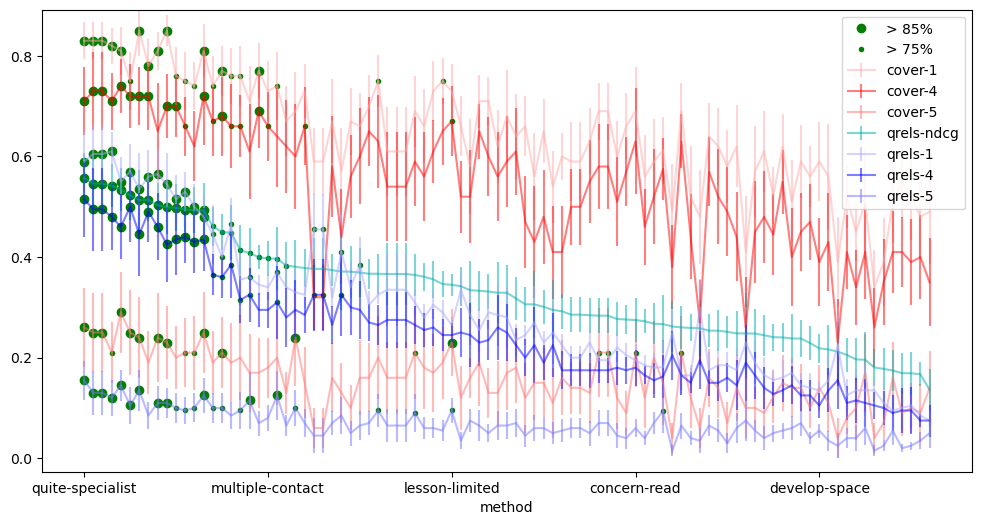

In [29]:
from matplotlib.lines import Line2D
import pathlib as path

ax=leaderboard_df.plot.line(y='mean', yerr='stderr', color=["#ffaaaa", "#ff0000", "#ff7777", "#00aaaa", "#aaaaff", "#0000ff", "#7777ff" ],alpha=0.5, figsize=(12,6))

quantiles = leaderboard_df.quantile([0.1, 0.5,0.75,0.85])

data = leaderboard_df
custom_legend = [Line2D([0], [0],  linestyle='None', marker='o', color='green',  label='> 85%')
                 , Line2D([0], [0],  linestyle='None', marker='.', color='green',  label='> 75%')]

ax.legend(handles=custom_legend + ax.get_legend_handles_labels()[0], loc='upper right')

for column in data.columns:
   if column[0]=="mean":
    ax.scatter(data.index, data[column].where(data[column] > quantiles.loc[0.85,column]), 
               color='green', label=f"{column} > 85%", marker='o')
    ax.scatter(data.index, data[column].where(data[column] > quantiles.loc[0.75,column]), 
               color='green', label=f"{column} > 75%", marker='.')



In [31]:
fig = ax.get_figure()
plot_file = rubric_final.with_name(f"{rubric_final.stem}_plot").with_suffix(".leaderboard-plot.png")
z = fig.savefig(plot_file, dpi=300, bbox_inches='tight')

fig = ax.get_figure()
plot_file = rubric_final.with_name(f"{rubric_final.stem}_plot").with_suffix(".leaderboard-plot.svg")
z = fig.savefig(plot_file, dpi=300, bbox_inches='tight')


fig = ax.get_figure()
plot_file = rubric_final.with_name(f"{rubric_final.stem}_plot").with_suffix(".leaderboard-plot.pdf")
z = fig.savefig(plot_file, dpi=300, bbox_inches='tight')